In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import warnings
warnings.filterwarnings(action="ignore")

In [15]:
sns.set(style="whitegrid",
       font="Malgun Gothic",
       rc={"axes.unicode_minus":False})

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

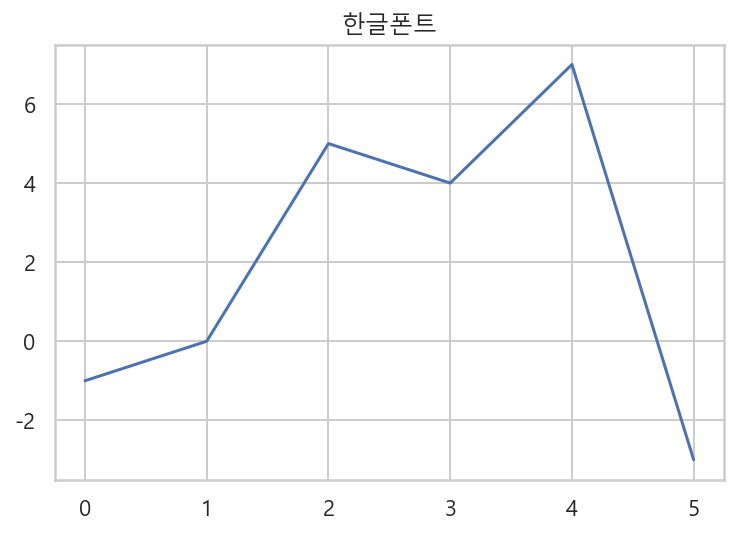

In [16]:
pd.Series([-1,0,5,4,7,-3]).plot(title="한글폰트")

In [18]:
df = pd.read_csv("C:/Users/joyh1/Desktop/DSC/Inflearn강의자료/데이터분석/data/전국도시공원표준데이터.csv",
                encoding='cp949')

In [20]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


* Cardinality는 상대적인 개념
    - Cardinality(집합원의 갯수)가 높다 : 중복성이 낮다
    - Cardinality가 낮다 : 중복성이 높다

In [23]:
from pandas_profiling import ProfileReport
# %time : 시간얼마나 걸리는지 보여줌
%time profile = ProfileReport(df, title="도시공원 표준 데이터")
profile.to_file(output_file="park_pandas_profilereport.html")


Wall time: 1min 27s


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [26]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [27]:
df.isnull().mean()*100

관리번호              0.000000
공원명               0.000000
공원구분              0.000000
소재지도로명주소         55.676242
소재지지번주소           5.397806
위도                0.000000
경도                0.000000
공원면적              0.000000
공원보유시설(운동시설)     73.286652
공원보유시설(유희시설)     61.603352
공원보유시설(편익시설)     71.968903
공원보유시설(교양시설)     93.604234
공원보유시설(기타시설)     82.819650
지정고시일            16.055577
관리기관명             4.157248
전화번호              6.506037
데이터기준일자           0.000000
제공기관코드            0.000000
제공기관명             0.000000
Unnamed: 19     100.000000
dtype: float64

In [33]:
sns.set(font="Malgun Gothic",
       rc={"axes.unicode_minus":False})

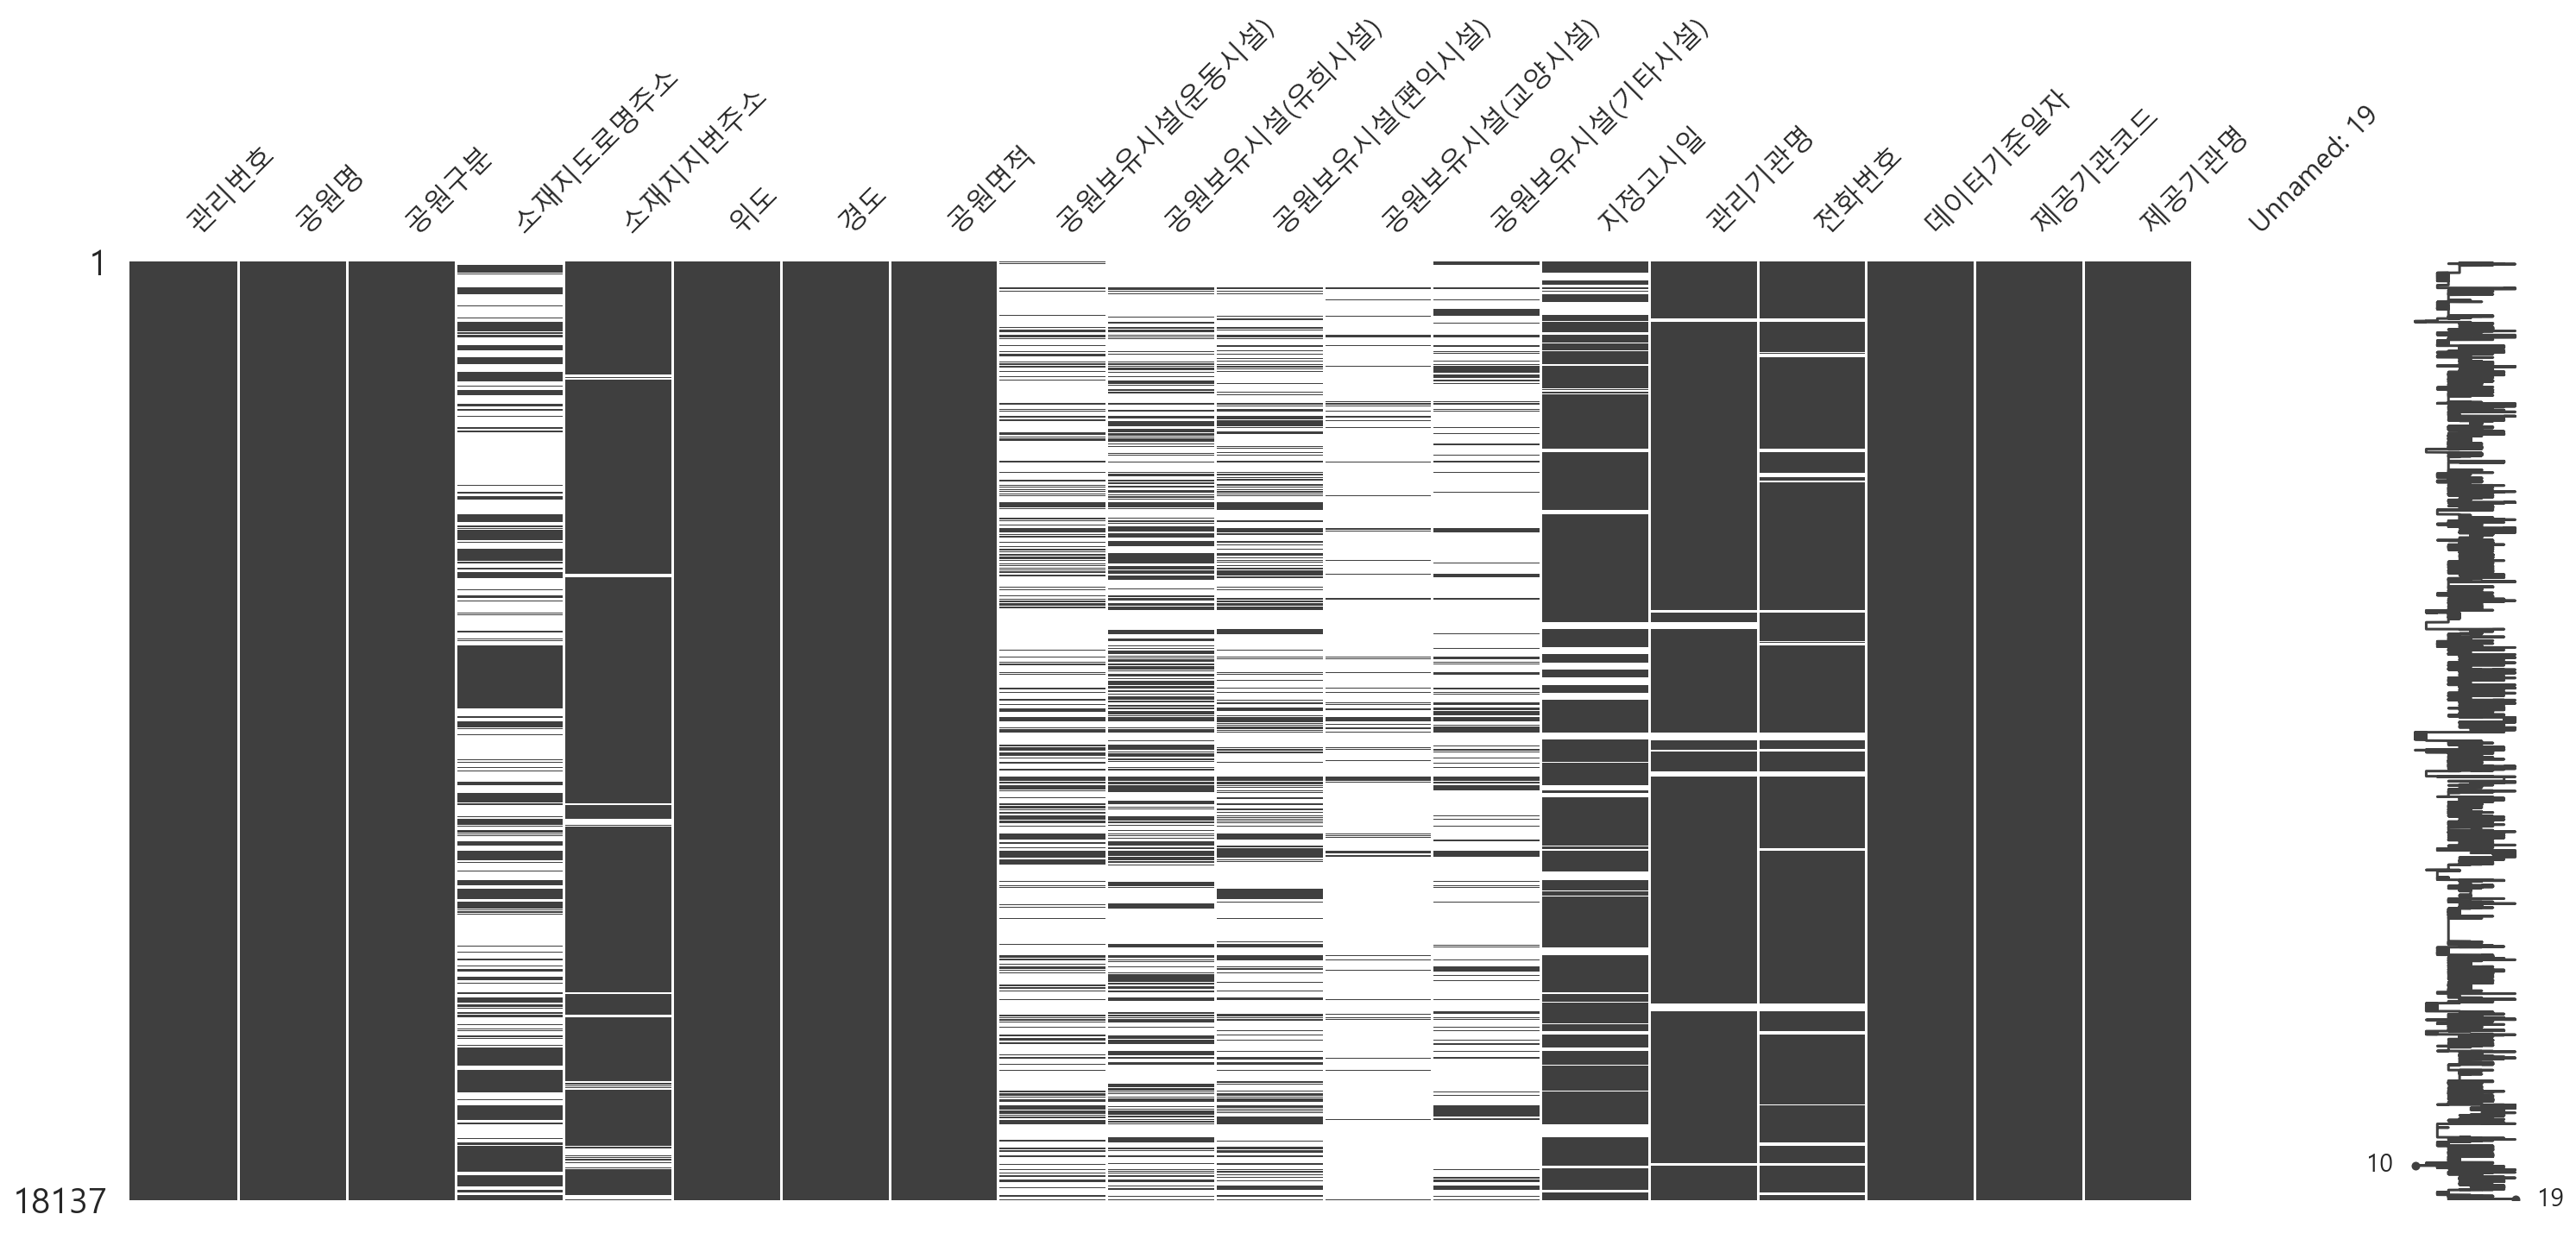

In [34]:
import missingno

missingno.matrix(df)

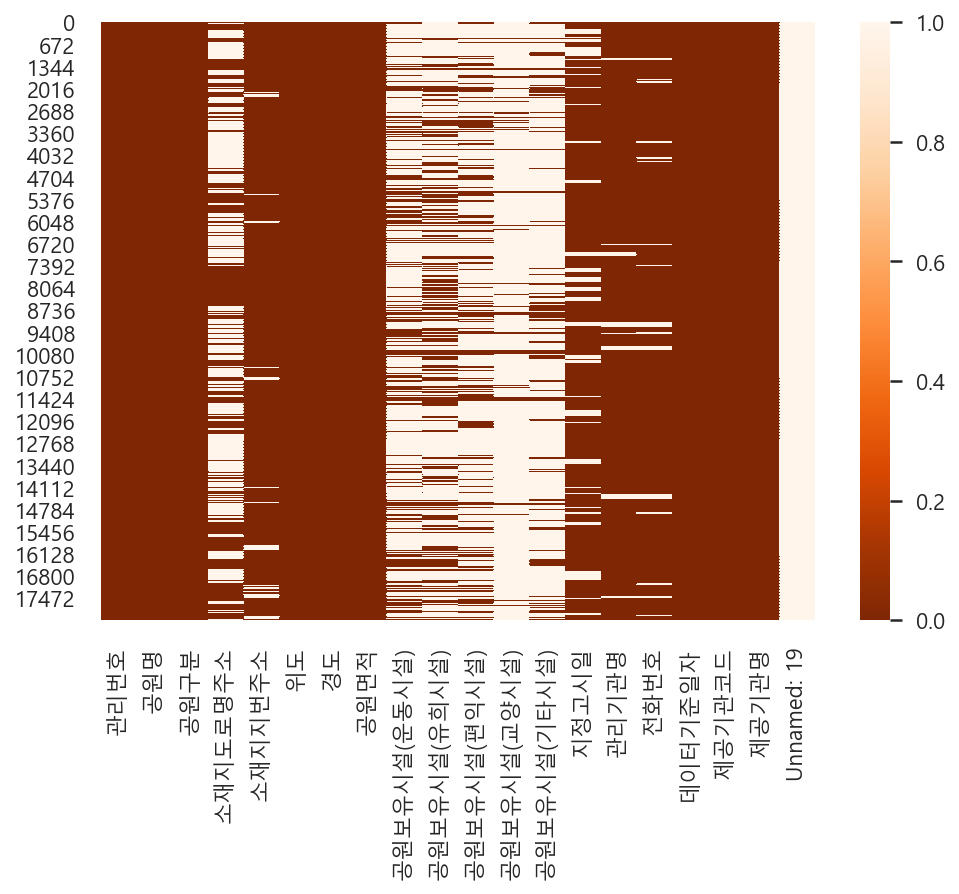

In [38]:
null = df.isnull()
sns.heatmap(null, cmap="Oranges_r")

In [39]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [41]:
df = df.drop('Unnamed: 19', axis=1)
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구


In [42]:
df['소재지도로명주소'].isnull().sum()

10098

In [43]:
df['소재지지번주소'].isnull().sum()

979

In [45]:
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
22,26440-00023,명지공원,근린공원,부산광역시 강서구 명지오션시티7로 30 (명지동),부산광역시 강서구 명지동 3247번지,35.087766,128.908524,170405.0,10,NaN,"화장실2, 주차장, 관리사무소",NaN,"바닥분수, 다목적운동장, 볼라드62, 안내판4, 안내석, 야외석물탁자5, 통돌벤치2...",2001-09-26,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
23,26440-00024,철새탐방공원,문화공원,부산광역시 강서구 명지오션시티1로 284 (명지동),부산광역시 강서구 명지동 3308-3,35.084080,128.911810,1344.0,NaN,NaN,NaN,NaN,"이층정자1, 철새탐조대1, 등의자2",2008-11-12,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
32,26440-00033,보람공원,근린공원,부산광역시 강서구 녹산산단262로14번길 20 (송정동),부산광역시 강서구 송정동 1718,35.088095,128.843216,27739.0,9,NaN,"화장실, 주차장",NaN,"그늘시렁4, 평의자9, 등의자33, 농구골대2, 다목적운동장, 문주4, 안내판2, ...",1992-03-26,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
38,26440-00039,지사공원(2호근린공원),근린공원,부산광역시 강서구 과학산단2로20번길 7-7 (지사동),부산광역시 강서구 지사동 1180,35.151337,128.831400,11232.0,13,조합놀이기구,문화회관,NaN,"전시벽6, 상징조형물, 파고라, 야외무대62.1㎡, 평의자3, 등의자6, 연식의자1...",2002-11-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
44,26440-00045,화암공원,근린공원,부산광역시 강서구 화전산단5로 131 (화전동),부산광역시 강서구 화전동 554-3,35.110563,128.877536,21908.0,9,조합놀이기구1,화장실,민속문화기념물(동제당),"사각플랜터11, 해시계광장조형물, 입체간판, 파고라7, 평상7, 막구조파고라12, ...",2005-12-30,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18027,11590-00040,국화원,소공원,"서울특별시 동작구 상도로30길 39(상도동, 상도두산위브아파트)",서울특별시 동작구 상도동 529 상도두산위브아파트,37.504836,126.943714,757.0,NaN,NaN,NaN,NaN,NaN,2007-11-08,서울특별시 동작구청,NaN,2019-02-20,3190000,서울특별시 동작구
18121,28140-00011,창영공원,어린이공원,인천광역시 동구 우각로 26,인천광역시 동구 창영동 21-15,37.470778,126.639105,1019.8,"허리돌리기, 마라톤운동, 몸통돌리기","조합놀이대, 흔들놀이",음수대,NaN,"파고라, 의자, 앉음벽",1999-08-02,인천광역시 동구청,032-770-6205,2019-07-30,3500000,인천광역시 동구
18125,28140-00002,화도진공원,근린공원,인천광역시 동구 화도진로 114,인천광역시 동구 화수동 140-1,37.481481,126.628353,20830.0,"온몸노젓기, 등허리지압기, 어깨근육풀기, 마라톤운동, 하체근육운동, 하늘걷기",NaN,"주차장, 화장실, 음수대,공중전화","병영 11동, 유물전시관, 한미수교기념비, 아포전시장","관리사무실, 벽천분수, 앉음벽, 국기게양대",1986-09-29,인천광역시 동구청,032-770-6202,2019-07-30,3500000,인천광역시 동구
18126,28140-00003,"인천교공원(A,B블럭)",근린공원,인천광역시 동구 방축로 231,인천광역시 동구 송림동 318,37.477844,126.669618,94068.0,"축구장, 족구장겸농구장, 육상트랙","조합놀이대, 그네, 모래놀이터","주차장, 화장실, 음수대",어린이교통안전교육장,"어린이교통공원, 구민운동장, 관리사무실, 국기게양대",1986-09-29,인천광역시 동구청,032-770-6203,2019-07-30,3500000,인천광역시 동구


In [46]:
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명


In [48]:
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
df['소재지도로명주소'].isnull().sum()

0

In [51]:
df['소재지지번주소'] = df['소재지지번주소'].fillna(df['소재지도로명주소'])
df['소재지지번주소'].isnull().sum()

0

In [56]:
df['시도'] = df['소재지도로명주소'].str.split(" ", expand=True)[0]
df['구군'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]
df.head(2)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,...,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,...,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구


In [57]:
df['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [61]:
# str.replcae하면 "강원" 들어가있는 글자 다바꿈
df['시도'] = df['시도'].str.replace("강원도","강원")

In [63]:
# 그래서 단순히 replace만 활용!
df['시도'] = df['시도'].replace("강원","강원도")
df['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

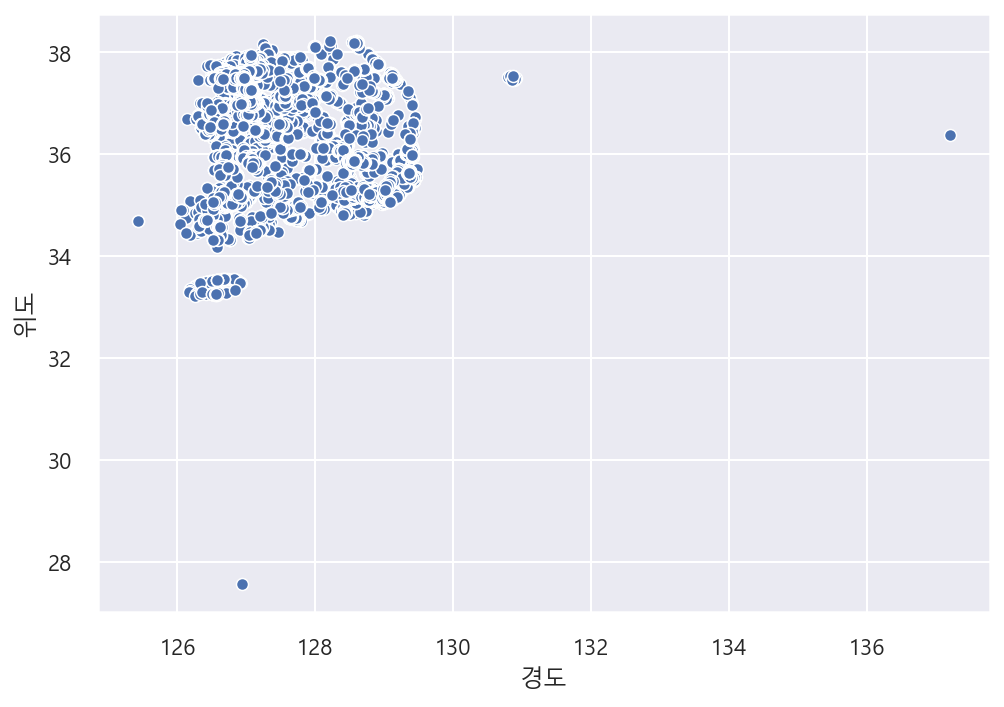

In [64]:
sns.scatterplot(data=df, x='경도',y='위도')

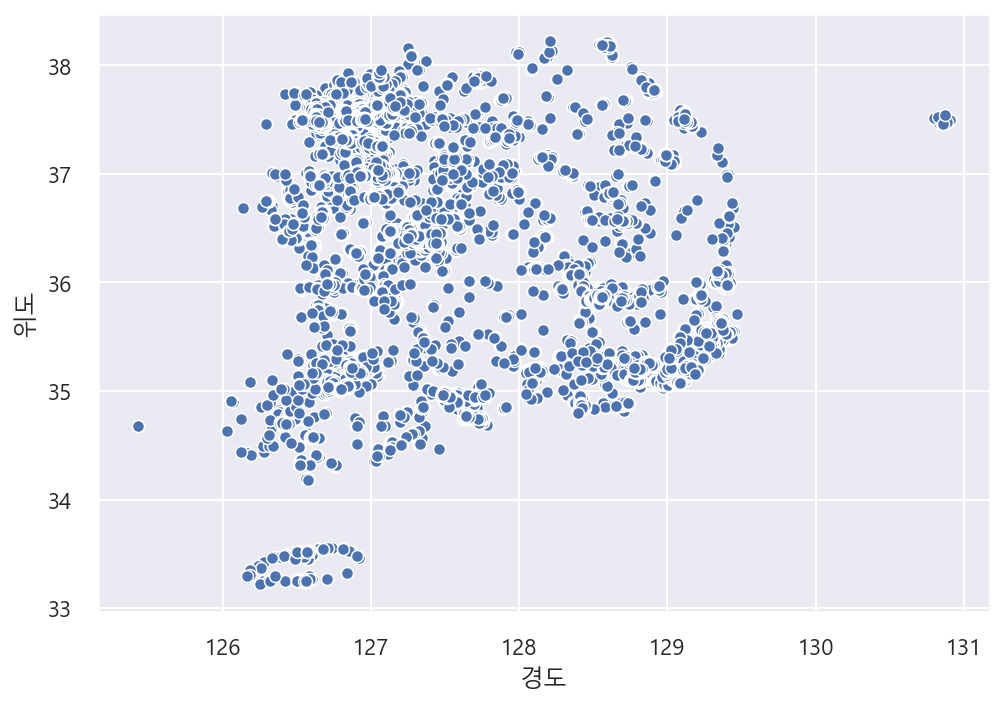

In [68]:
df_park = df[(df['경도'] < 132) & (df['위도'] > 32)].copy()
sns.scatterplot(data=df_park, x='경도', y='위도')

In [69]:
df[(df['경도'] > 132) | (df['위도'] < 32)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시


In [70]:
# 이상치 위,경도 다시 재조정
df.loc[df['위도'] == 27.551606, '위도'] = 37.552295
df.loc[df['경도'] == 126.929047, '경도'] = 126.928972
df.loc[df['위도'] == 36.374204, '위도'] = 36.633198
df.loc[df['경도'] == 137.202661, '경도'] = 127.330203

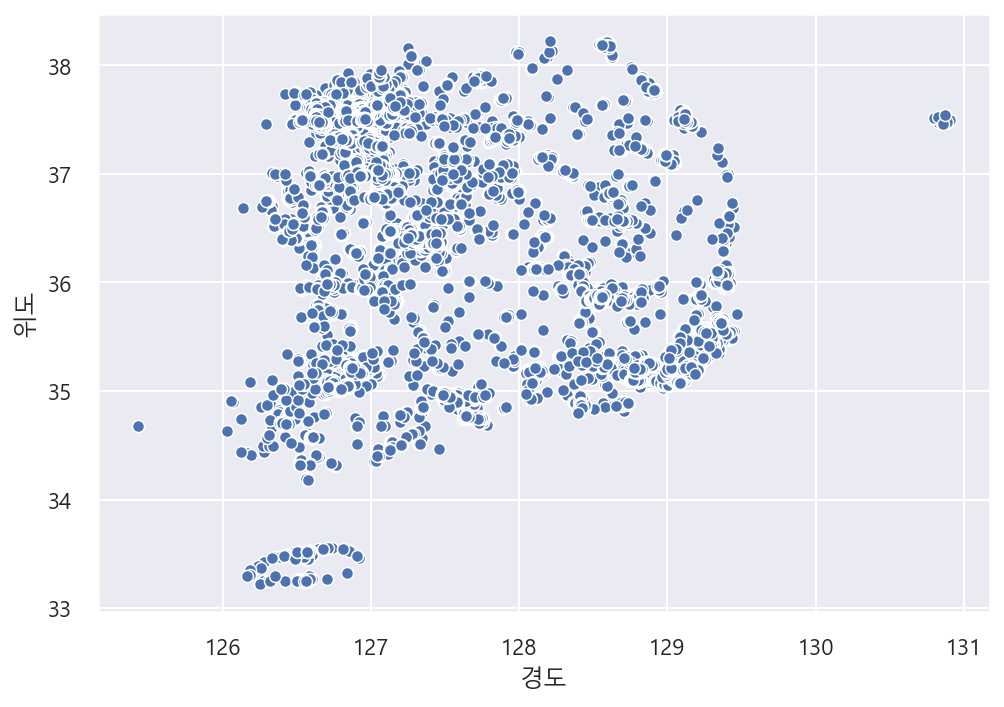

In [71]:
# 잘 조정됬는지 확인
sns.scatterplot(data=df, x='경도',y='위도')